<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [0]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
merged = pd.merge(cell_phones, population)
print(merged.shape)
merged.head()

(8590, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
geo_subset = geo_country_codes[['geo', 'country']]

In [0]:
df_1 = pd.merge(merged, geo_subset, how='inner', on='geo')
print(df_1.shape)
df_1.head()

(8590, 5)


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
df_1['cell_phones_total'] / df_1['population_total']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
          ...   
8560    0.000000
8561    0.000000
8562    0.000000
8563    0.000000
8564    0.000000
8565    0.000000
8566    0.000000
8567    0.000000
8568    0.000000
8569    0.000490
8570    0.001598
8571    0.014422
8572    0.021800
8573    0.025392
8574    0.027101
8575    0.028784
8576    0.033320
8577    0.050008
8578    0.064700
8579    0.091948
8580    0.122043
8581    0.288981
8582    0.546630
8583    0.639482
8584    0.857459
8585    0.905587
8586    0.765566
8587    0.8085

In [0]:
df_1['cells_per_person'] = df_1['cell_phones_total'] / df_1['population_total']
df_1.tail()

,geo,time,cell_phones_total,population_total,country,cells_per_person
8585,zwe,2013,13633167.0,15054506,Zimbabwe,0.905587
8586,zwe,2014,11798652.0,15411675,Zimbabwe,0.765566
8587,zwe,2015,12757410.0,15777451,Zimbabwe,0.808585
8588,zwe,2016,12878926.0,16150362,Zimbabwe,0.797439
8589,zwe,2017,14092104.0,16529904,Zimbabwe,0.852522


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
df_1['geo'] = df_1['geo'].str.upper()
df_1.head()

,geo,time,cell_phones_total,population_total,country,cells_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
df_1.describe()

,time,cell_phones_total,population_total,cells_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [0]:
df_1.describe(include='all')

,geo,time,cell_phones_total,population_total,country,cells_per_person
count,8590,8590.000000,8.590000e+03,8.590000e+03,8590,8590.000000
unique,195,NaN,NaN,NaN,195,NaN
top,CMR,NaN,NaN,NaN,Costa Rica,NaN
freq,46,NaN,NaN,NaN,46,NaN
mean,NaN,1994.193481,9.004950e+06,2.983823e+07,NaN,0.279639
std,NaN,14.257975,5.573408e+07,1.161284e+08,NaN,0.454247
min,NaN,1960.000000,0.000000e+00,4.433000e+03,NaN,0.000000
25%,NaN,1983.000000,0.000000e+00,1.456148e+06,NaN,0.000000
50%,NaN,1995.000000,6.200000e+03,5.725062e+06,NaN,0.001564
75%,NaN,2006.000000,1.697652e+06,1.810581e+07,NaN,0.461149


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [0]:
top_5 = df_1[['time', 'country', 'cell_phones_total']]

top_5 = top_5[top_5['time'] == 2017]

top_5 = top_5.sort_values(by='cell_phones_total', ascending=False)

top_5.head(5)

,time,country,cell_phones_total
1496,2017,China,"1,474,097,000.0"
3595,2017,India,"1,168,902,277.0"
3549,2017,Indonesia,"458,923,202.0"
8134,2017,United States,"395,881,000.0"
1084,2017,Brazil,"236,488,548.0"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [0]:
more_phones = df_1.loc[df_1['cell_phones_total'] > df_1['population_total']]

more_phones = more_phones.loc[more_phones['country'] == 'United States']

print(more_phones.shape)
more_phones.head()

# it looks like the first year USA had more phones than people was 2014

(4, 6)


,geo,time,cell_phones_total,population_total,country,cells_per_person
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,USA,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,USA,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354


In [0]:
df_1.iloc[8130] # just testing to see if the year before has less phones than population

geo                                USA
time                              2013
cell_phones_total        310,698,000.0
population_total             315536676
country                  United States
cells_per_person    0.9846652501340288
Name: 8130, dtype: object

### Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [0]:
cont_5 = ['China', 'India', 'United States', 'Indonesia', 'Brazil']

In [0]:
atop_5 = df_1[['time', 'country', 'cell_phones_total']]

atop_5 = atop_5[atop_5['time'] >= 2007]

atop_5 = atop_5[atop_5['country'].isin(cont_5)]

atop_5 = atop_5.sort_values(by='cell_phones_total', ascending=False)

atop_5.head(5)

pivot_5 = atop_5.pivot(index='country', columns='time', values='cell_phones_total')
pivot_5.head()

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [0]:
pivot_5['increase'] = pivot_5[2017] - pivot_5[2007]
pivot_5.head()

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,increase
country,,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0","115,508,445.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0","926,791,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0","935,282,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0","365,536,321.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0","146,581,000.0"


In [0]:
pivot_5.sort_values(pivot_5['increase'], ascending=False)

# I think I just need to reset the index

KeyError: ignored

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [0]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [0]:
df['Occupation'].value_counts()

Acting, Comedy & Music     1203
Media                       756
Government and Politics     384
Other                       350
Name: Occupation, dtype: int64

In [0]:
modern_occupations = df.loc[df['Year'] >= 1999]
modern_occupations.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [0]:
pd.crosstab(modern_occupations['Year'], modern_occupations['Occupation'], normalize='index')

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


### Part 2 — Recreate this explanatory visualization:

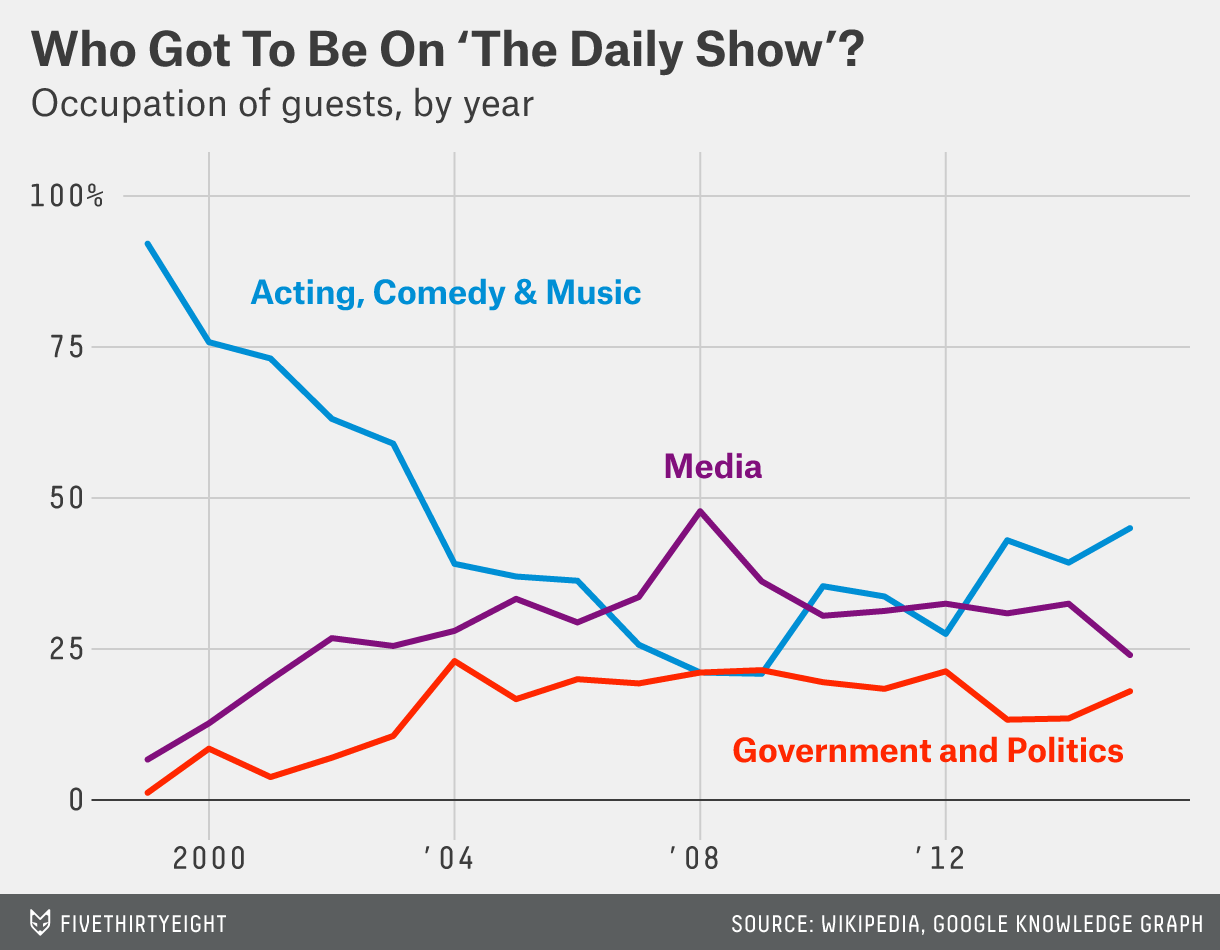

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [0]:
df_plot = pd.crosstab(modern_occupations['Year'], modern_occupations['Occupation'], normalize='index')

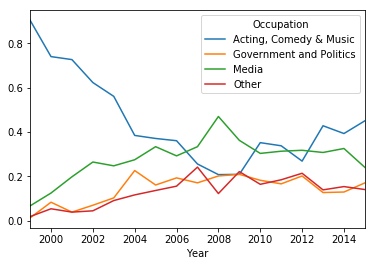

In [0]:
df_plot.plot();

# need to remove 'other' category

In [0]:
import seaborn as sns

In [0]:
df_plot = df_plot.reset_index()

In [0]:
# df_plot.drop(columns='Occupation')
df_plot.head()

Occupation,Year,"Acting, Comedy & Music",Government and Politics,Media,Other
0,1999,0.903614,0.012048,0.066265,0.018072
1,2000,0.739645,0.082840,0.124260,0.053254
2,2001,0.726115,0.038217,0.197452,0.038217
3,2002,0.622642,0.069182,0.264151,0.044025
4,2003,0.560241,0.102410,0.246988,0.090361


In [0]:
df_plot = df_plot.drop(columns='Other')

In [0]:
df_melt = pd.melt(df_plot, id_vars=['Year'])

print(df_melt.head())
df_melt['value'].dtypes

   Year              Occupation     value
0  1999  Acting, Comedy & Music  0.903614
1  2000  Acting, Comedy & Music  0.739645
2  2001  Acting, Comedy & Music  0.726115
3  2002  Acting, Comedy & Music  0.622642
4  2003  Acting, Comedy & Music  0.560241


dtype('float64')

In [0]:
df_melt['Occupation'].value_counts()

Media                      17
Government and Politics    17
Acting, Comedy & Music     17
Name: Occupation, dtype: int64

In [0]:
yticks = [0,.25,.50,.75,1]
xticks = [2000, 2004, 2008, 2012] 

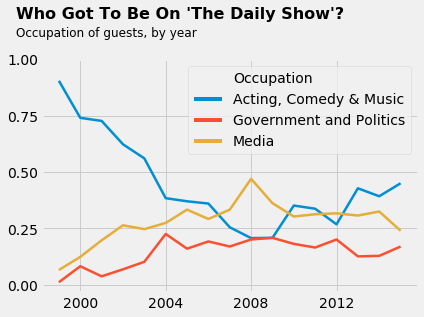

In [0]:
g = sns.lineplot(x='Year', y='value', hue='Occupation', data=df_melt, linewidth=2.5,);


plt.style.use('fivethirtyeight')

plt.text(x=1997, y=1.18, fontsize=16, fontweight='bold',
        s = "Who Got To Be On 'The Daily Show'?")

plt.text(x=1997, y=1.1, fontsize=12,
        s = "Occupation of guests, by year")

plt.yticks(yticks)
plt.xticks(xticks)
plt.xlabel('')
plt.ylabel('')
plt.show()


**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.